# Community Detection Pada

## Import library dan membaca data

In [13]:
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Membaca data dari file CSV
data = pd.read_csv('net_IKN_Nusantara.csv')

Pada bagian ini, kita mengimpor beberapa library yang akan digunakan, yaitu pandas untuk manipulasi data, networkx untuk analisis jaringan, community untuk algoritma komunitas, serta matplotlib untuk visualisasi data. Selanjutnya, kita membaca data dari file CSV menggunakan pd.read_csv dan menyimpannya dalam variabel data.

## Mengambil kolom kedua dan ketiga

In [14]:
subset_data = data.iloc[:, [1, 2]]

Kode di atas digunakan untuk mengambil kolom kedua dan ketiga dari data yang telah dibaca sebelumnya yaitu kolom from dan to. Kita menggunakan iloc untuk memilih kolom berdasarkan indeksnya. Pada kasus ini, kita mengambil kolom dengan indeks 1 dan 2 dan menyimpannya dalam variabel subset_data.

## Membuat graf dari subset data

In [15]:
G = nx.from_pandas_edgelist(subset_data, source='from', target='to')

Pada bagian ini, kita menggunakan fungsi from_pandas_edgelist dari library networkx untuk membuat graf berdasarkan data yang ada di subset_data. Kita menentukan kolom 'from' sebagai sumber (source) dan kolom 'to' sebagai tujuan (target) pada fungsi ini. Hasil graf disimpan dalam variabel G.

## Menjalankan algoritma Louvain

In [16]:
partition = community.best_partition(G)

Kode di atas digunakan untuk menjalankan algoritma Louvain pada graf G yang telah dibuat sebelumnya. Algoritma Louvain adalah algoritma yang digunakan untuk deteksi komunitas dalam jaringan. Hasil partisi komunitas disimpan dalam variabel partition.

Kode "partition = community.best_partition(G)" menggunakan paket atau modul `community` yang merupakan bagian dari library Python NetworkX. Kode ini mengimplementasikan metode Louvain untuk membagi jaringan `G` menjadi komunitas-komunitas yang saling terhubung.

Berikut adalah tahapan yang terjadi dalam kode tersebut:

1. Input jaringan: Kode ini mennerima jaringan `G` sebagai input. Jaringan ini bisa berupa grafik yang dibuat menggunakan pustaka NetworkX atau struktur data yang setara yang mewakili jaringan.

2. Inisialisasi partisi awal: Pada awalnya, setiap simpul dalam jaringan diberi label partisi yang berbeda. Ini berarti setiap simpul awalnya dianggap sebagai komunitas terpisah.

3. Pengoptimalan modularitas: Metode Louvain dilakukan untuk memaksimalkan modularitas jaringan. Proses ini melibatkan langkah-langkah berikut:
   - Iterasi melalui setiap simpul dalam jaringan.
   - Untuk setiap simpul, simpul tersebut dipindahkan ke komunitas tetangga jika memungkinkan, dan peningkatan modularitas dihitung. Modularitas meningkat jika simpul tersebut memiliki lebih banyak koneksi internal dengan komunitas tetangganya dibandingkan dengan komunitas sebelumnya.
   - Langkah ini diulangiterasi hingga tidak ada lagi simpul yang dapat dipindahkan untuk meningkatkan modularitas.

4. Agregasi atau rekursi: Setelah pengoptimalan modularitas, langkah agregasi atau rekursi dilakukan untuk menggabungkan simpul-simpul dalam komunitas yang sama menjadi simpul baru.
   - Simpul-simpul dalam komunitas yang sama digabungkan menjadi simpul baru.
   - Jaringan baru yang dihasilkan dari langkah ini digunakan sebagai input untuk melanjutkan langkah pengoptimalan modularitas dan agregasi.
   - Proses pengoptimalan modularitas dan agregasi ini diulangiterasi hingga tidak ada lagi peningkatan modularitas yang signifikan yang dapat dicapai.

5. Output partisi: Setelah iterasi selesai, `partition` akan berisi label partisi yang ditugaskan kepada setiap simpul dalam jaringan. Partisi ini mencerminkan komunitas-komunitas yang diidentifikasi oleh metode Louvain.

Jadi, pada akhirnya, variabel `partition` akan berisi partisi jaringan `G` di mana setiap simpul diberi label komunitas yang sesuai berdasarkan hasil dari algoritma Louvain.

## Mengatur posisi node pada graf

In [17]:
pos = nx.spring_layout(G)

Pada bagian ini, kita menggunakan fungsi spring_layout dari library networkx untuk mengatur posisi node pada graf. Fungsi ini akan menghasilkan posisi node secara visual dengan menggunakan metode force-directed layout. Hasil posisi node disimpan dalam variabel pos.

## Mengambil jumlah komunitas

In [18]:
num_communities = max(partition.values()) + 1

Kode di atas digunakan untuk menghitung jumlah komunitas dalam partisi yang diperoleh dari algoritma Louvain. Kita mengambil nilai maksimum dari partisi dan menambahkannya dengan 1 karena indeks komunitas dimulai dari 0. Hasil jumlah komunitas disimpan dalam variabel num_communities.

## Membuat colormap dengan jumlah warna sesuai jumlah komunitas

In [19]:
cmap = cm.get_cmap('tab20', num_communities)

Pada bagian ini, kita menggunakan fungsi get_cmap dari library matplotlib.cm untuk membuat colormap dengan jumlah warna sesuai dengan jumlah komunitas. Kita menggunakan colormap 'tab20' yang memiliki 20 warna yang berbeda. Hasil colormap disimpan dalam variabel cmap.

## Menentukan ukuran canvas

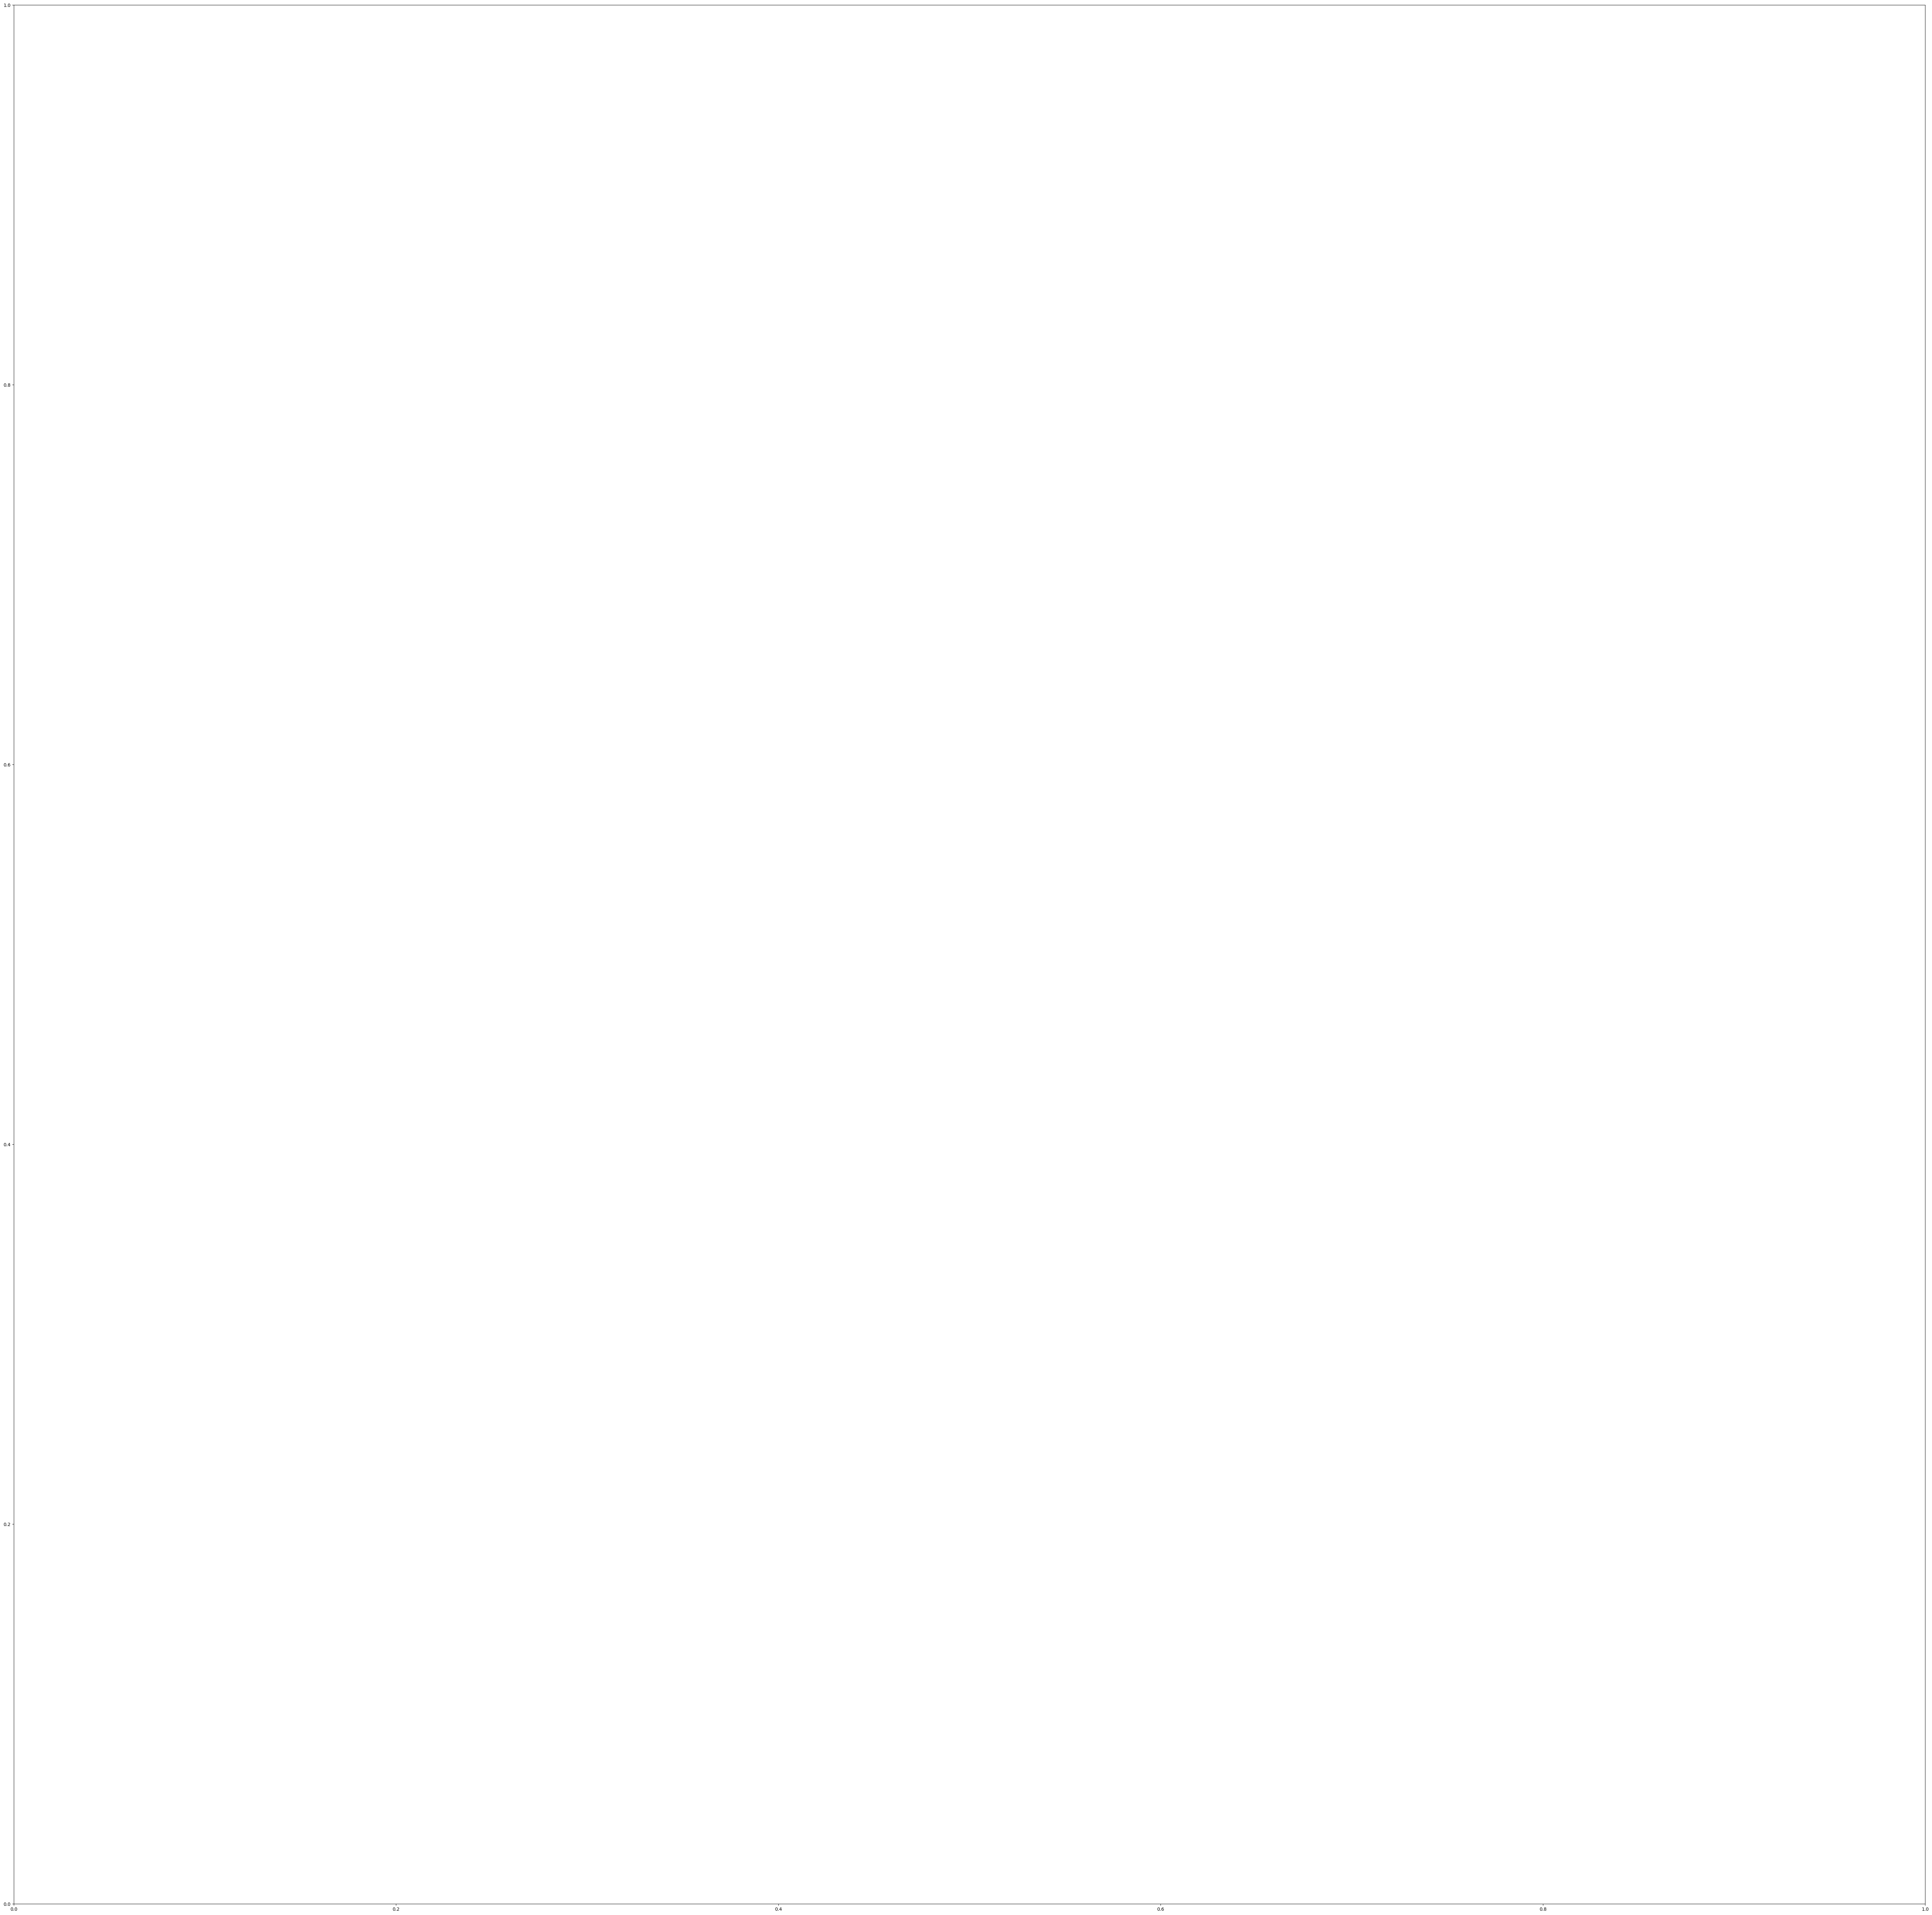

In [20]:
fig, ax = plt.subplots(figsize=(75, 75))

Kode di atas digunakan untuk menentukan ukuran canvas atau gambar visualisasi dengan menggunakan plt.subplots. Kita mengatur ukuran canvas dengan figsize=(75, 75) yang berarti lebar dan tinggi gambar sebesar 75.

## Menggambar node pada graf dengan warna sesuai komunitas

In [21]:
node_colors = [cmap(partition[node]) for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, ax=ax)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Pada bagian ini, kita menggambar node pada graf dengan menggunakan nx.draw_networkx_nodes dari library networkx. Kita menentukan posisi node (pos), warna node sesuai dengan komunitasnya (node_colors), dan menggunakan colormap yang telah dibuat sebelumnya (cmap). Hasil gambar node disimpan dalam ax.

## Menggambar edge pada graf

In [22]:
nx.draw_networkx_edges(G, pos, ax=ax)

Kode di atas digunakan untuk menggambar edge pada graf dengan menggunakan nx.draw_networkx_edges dari library networkx. Kita menentukan posisi edge (pos) dan ax yang merupakan canvas gambar yang telah ditentukan sebelumnya.

## Menampilkan label node dengan font size berdasarkan jumlah degree tertinggi di setiap komunitas

In [23]:
for community_id in set(partition.values()):
    community_nodes = [node for node, c_id in partition.items() if c_id == community_id]
    subgraph = G.subgraph(community_nodes)
    node_degrees = dict(subgraph.degree())
    max_degree = max(node_degrees.values())
    labels = {node: node if degree == max_degree else '' for node, degree in node_degrees.items()}
    font_size = (10 + 5 * (max_degree / max(node_degrees.values())))*2
    nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=font_size, ax=ax)

Pada bagian ini, kita melakukan perulangan untuk setiap komunitas yang ada dalam partisi. Di dalam perulangan, kita mengambil node-node yang termasuk dalam komunitas tersebut dan membuat subgraf berdasarkan node-node tersebut. Selanjutnya, kita menghitung derajat (degree) setiap node dalam subgraf dan mencari derajat tertinggi (max_degree). Kita membuat label-label untuk node-node dengan mempertahankan node dengan derajat tertinggi, sedangkan node lainnya tidak memiliki label. Ukuran font label ditentukan berdasarkan derajat tertinggi menggunakan rumus (10 + 5 * (max_degree / max(node_degrees.values())))*2. Terakhir, kita menggunakan nx.draw_networkx_labels untuk menggambar label-node pada subgraf dengan posisi (pos) dan menggunakan ax yang telah ditentukan sebelumnya.

## Menampilkan hasil visualisasi

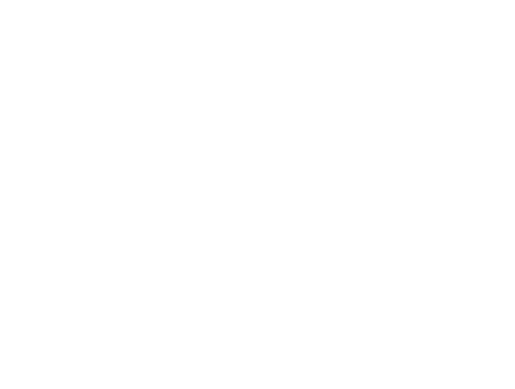

In [24]:
plt.axis('off')
plt.show()

Pada bagian terakhir, kita menggunakan plt.axis('off') untuk menghilangkan sumbu pada gambar dan plt.show() untuk menampilkan visualisasi graf yang telah dibuat.